# Pod Load Analysis over GCDT $F_{4.5}$ Intespecific Population

### Rationale
Before built the mapping population was carried out a preliminary heat trial at CIAT HQ heat greenhouses for screen whole population composed by 892 $F_{45}$ families, the main objective of this evaluation was get a criteria for reduce population size to a number suitable for phenotype and genotype. The variable used was pod load a visual score of fuctification. The scale of this variable was 1 to best pod load to 5 worst por load.

In [ ]:
import pandas as pd
from collections import defaultdict

In [13]:
#Phenotipic information of pod load in the column Adap. M *F4.5
df = pd.read_excel('./../data/repAdap.xlsx')
df.head()

,UE,Cross,F3.4 Surco,Column,Row,Cod,No,Adap. M *F4.5,family,f1.2,f2.3,f3.4,p1,p2,p3,p4
0,1,((VAP 1xG 40056)F1 X SEN 118)F1 X SMR 155...,963.0,1,34,QINT,19095-001,2,((VAP 1xG 40056)F1 X SEN 118)F1 X SMR 155,001F1,18C,03C,VAP 1,G 40056,SEN 118,SMR 155
1,2,((VAP 1xG 40056)F1 X SEN 118)F1 X SEN 118...,1293.0,1,33,QINT,19098-001,2,((VAP 1xG 40056)F1 X SEN 118)F1 X SEN 118,001F1,15C,02C,VAP 1,G 40056,SEN 118,SEN 118
2,3,((VAP 1xG 40287)F1 X ICTA LIGERO)F1 X SMR ...,1349.0,1,32,QINT,19103-003,2,((VAP 1xG 40287)F1 X ICTA LIGERO)F1 X SMR 155,003F1,11C,02C,VAP 1,G 40287,ICTA LIGERO,SMR 155
3,4,((VAP 1xG 40056)F1 X SEN 118)F1 X SMR 155...,1019.0,1,31,QINT,19095-002,2,((VAP 1xG 40056)F1 X SEN 118)F1 X SMR 155,002F1,01C,01C,VAP 1,G 40056,SEN 118,SMR 155
4,5,((VAP 1xG 40287)F1 X SEF 10)F1 X ICTA LIG...,1660.0,1,30,QINT,19111-004,2,((VAP 1xG 40287)F1 X SEF 10)F1 X ICTA LIGERO,004F1,16C,03C,VAP 1,G 40287,SEF 10,ICTA LIGERO


For visualize pod load data were made by crossing stacked barplots with pod load score for each $F_{1.2}$ subgroup 

In [15]:

fdata = defaultdict(dict)
titles = list()
for i, subdf in df.groupby(['family', 'f1.2'], as_index=False):
    if i[0] not in titles:
        titles.append(i[0])
    counts = subdf.groupby('Adap. M *F4.5', as_index=False).count()
    countsTotal = counts['UE'].sum()
    for j in counts['Adap. M *F4.5'].unique():
        catData = list(counts[counts['Adap. M *F4.5'] == j]['UE'])[0]
        fdata["%s/%s" %i][j] = [round(catData/countsTotal+.0,2),catData]
    

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

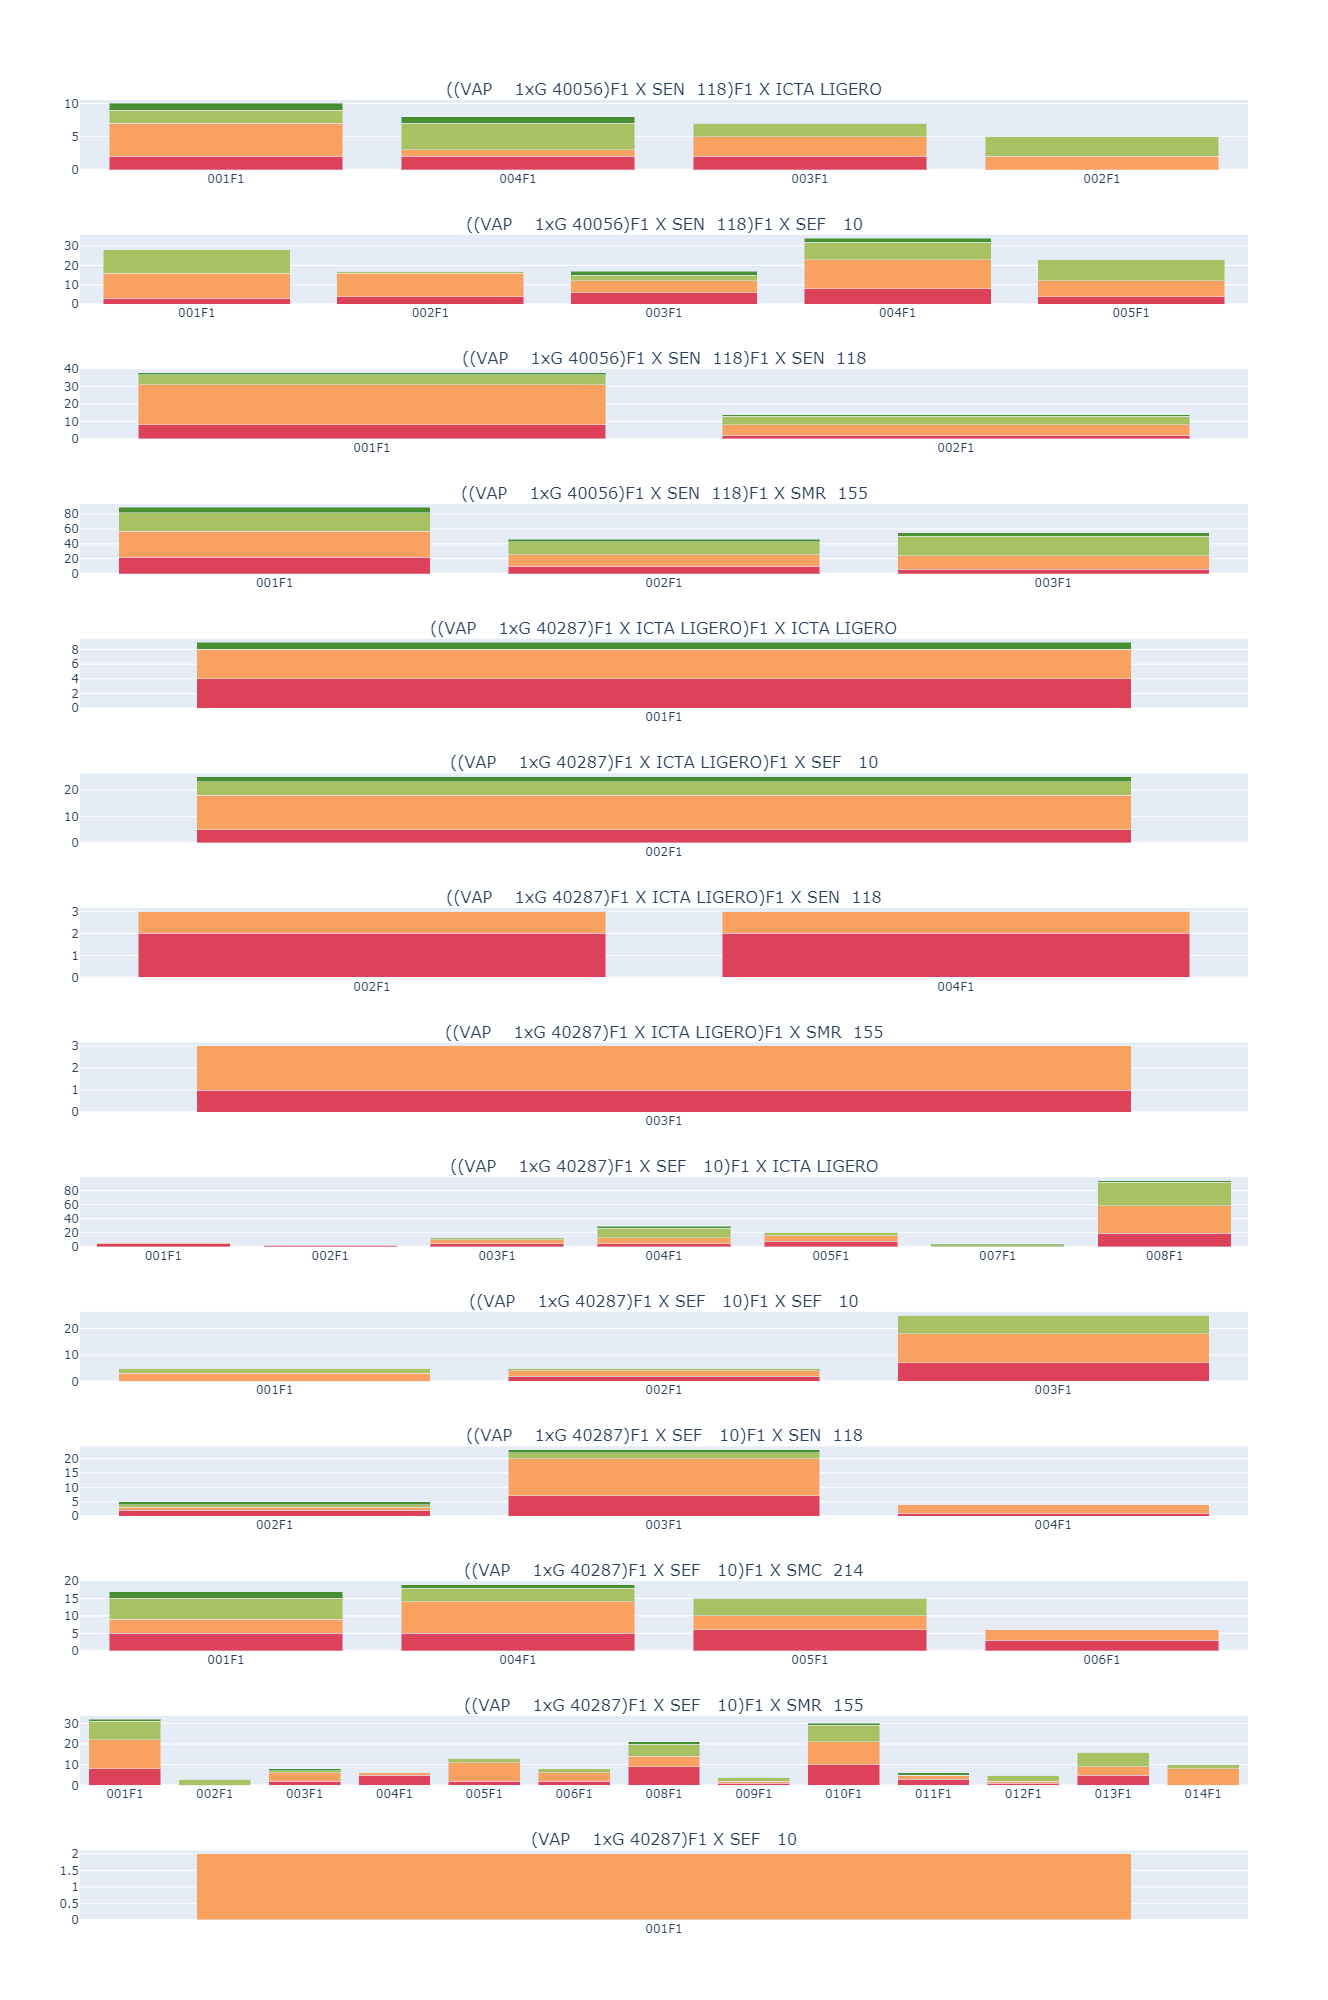

In [17]:
fig = make_subplots(rows=14, cols=1,subplot_titles=titles, shared_yaxes=True)
n = 1
for i, subdf in df.groupby('family', as_index=False):
    f1fams = list()
    adap = defaultdict(list)
    for j, fdf in subdf.groupby('f1.2', as_index=False):
        f1fams.append(j)
        counts = fdf.groupby('Adap. M *F4.5', as_index=False).count()
        countsTotal = counts['UE'].sum()
        for k in range(1,5):
            try:
                catData = list(counts[counts['Adap. M *F4.5'] == k]['UE'])[0]
                adap[k].append(catData)
            except IndexError:
                adap[k].append(0)
    if i :
        fig.add_trace(go.Bar(name="1", x=f1fams, y=adap[1],marker_color='#de425b'),row=n, col=1)
        fig.add_trace(go.Bar(name="2", x=f1fams, y=adap[2],marker_color='#f9a161'),row=n, col=1)
        fig.add_trace(go.Bar(name="3", x=f1fams, y=adap[3],marker_color='#a8c163'),row=n, col=1)
        fig.add_trace(go.Bar(name="4", x=f1fams, y=adap[4],marker_color='#488f31'),row=n, col=1)
        n += 1



fig['layout'].update(barmode="stack", 
                     xaxis={'categoryorder':'total descending'},
                     height=2000, 
                     width=700, 
                     showlegend=False)        


fig.show()